In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False}, style='white')

# Cohort Analysis

In [3]:
df = pd.read_csv('./cohort_analysis.csv')

df.head()

,cohort_month,months_since_first_order,num_customers,retention_rate
0,2016-09-01,0,4,1.0000
1,2016-10-01,0,321,1.0000
2,2016-10-01,6,1,0.0031
3,2016-10-01,9,1,0.0031
4,2016-10-01,11,1,0.0031


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cohort_month              215 non-null    object 
 1   months_since_first_order  215 non-null    int64  
 2   num_customers             215 non-null    int64  
 3   retention_rate            215 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.8+ KB


In [5]:
df['cohort_month'] = pd.to_datetime(df['cohort_month'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   cohort_month              215 non-null    datetime64[ns]
 1   months_since_first_order  215 non-null    int64         
 2   num_customers             215 non-null    int64         
 3   retention_rate            215 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.8 KB


In [6]:
# 코호트 피벗 테이블 생성
cohort_pivot = df.pivot_table(index='cohort_month', 
                               columns='months_since_first_order',
                               values='retention_rate',
                               aggfunc='mean')

cohort_pivot.head()

months_since_first_order,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,1.0,NaN,NaN,NaN,NaN,NaN,0.0031,NaN,NaN,0.0031,...,0.0031,NaN,0.0031,0.0031,NaN,NaN,0.0031,0.0031,0.0031,0.0062
2016-12-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.0026,NaN,0.0052,0.0013,0.0013,0.0039,0.0026,NaN,NaN,...,0.0079,0.0039,0.0013,NaN,0.0039,0.0039,NaN,NaN,0.0013,NaN
2017-02-01,1.0,0.0017,0.0017,0.0034,0.0023,0.0011,0.0023,0.0017,0.0011,0.0029,...,0.0034,0.0011,0.0023,0.0011,NaN,0.0017,0.0017,NaN,NaN,NaN


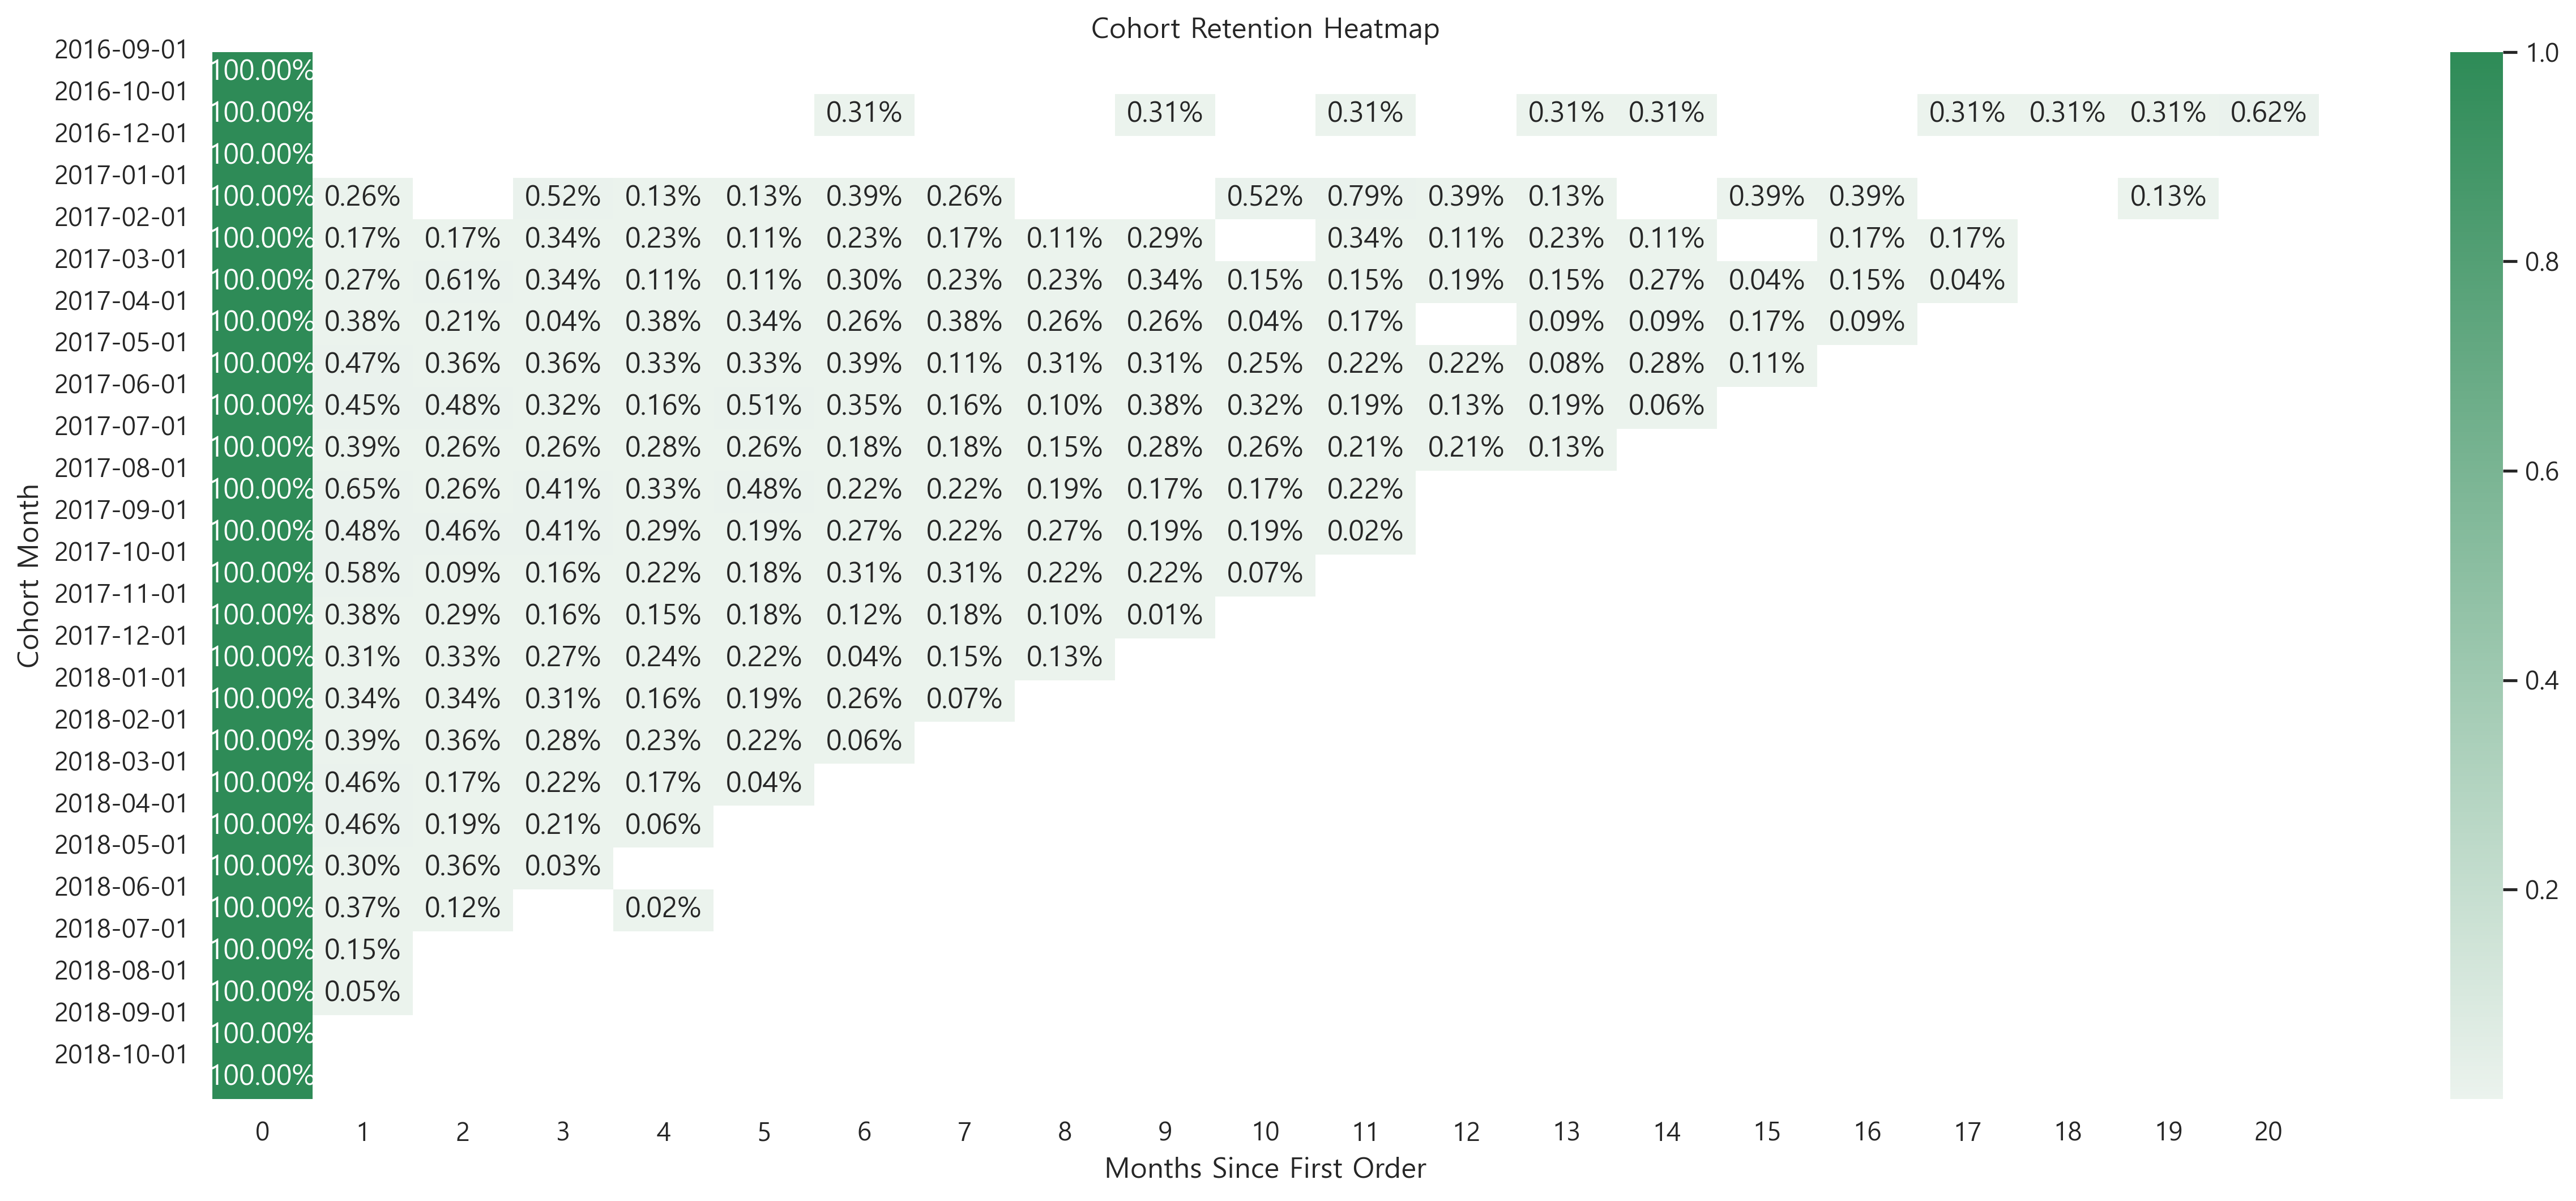

In [7]:
# 히트맵 그리기

plt.figure(figsize=(20, 8), dpi=300)

pastel_cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(cohort_pivot, annot=True, fmt=".2%", cmap=pastel_cmap)

plt.title('Cohort Retention Heatmap')
plt.xlabel('Months Since First Order')
plt.ylabel('Cohort Month')

ylabels = [item.strftime('%Y-%m-%d') for item in cohort_pivot.index]
plt.yticks(ticks=range(len(ylabels)), labels=ylabels)
plt.show()

# RFM Segmentation

In [8]:
df2 = pd.read_csv('./rfm_segmentation.csv')

df2.head()

,customer_unique_id,R_score,F_score,M_score,segment
0,d80730c15c647bc8f2ad77c908ba5ca9,4,1,1,Promising
1,b38211bd797f4fdd81a98b9d1754b606,4,1,1,Promising
2,317cfc692e3f86c45c95697c61c853a6,5,1,1,New Customers
3,bd06ce0e06ad77a7f681f1a4960a3cc6,2,1,1,Lost Customers
4,cf3839da0d9492ad151690b65f45d800,3,1,1,Hibernating Customers


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  93358 non-null  object
 1   R_score             93358 non-null  int64 
 2   F_score             93358 non-null  int64 
 3   M_score             93358 non-null  int64 
 4   segment             93358 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.6+ MB


In [10]:
df2['segment'].value_counts().to_frame()

,segment
Hibernating Customers,18636
Promising,18610
New Customers,18049
others,15589
Losing But Engaged,14225
Lost Customers,7546
Potential Loyalist,552
Loyal Customers,48
About To Sleep,39
Need Attention,32


<Figure size 1200x800 with 0 Axes>

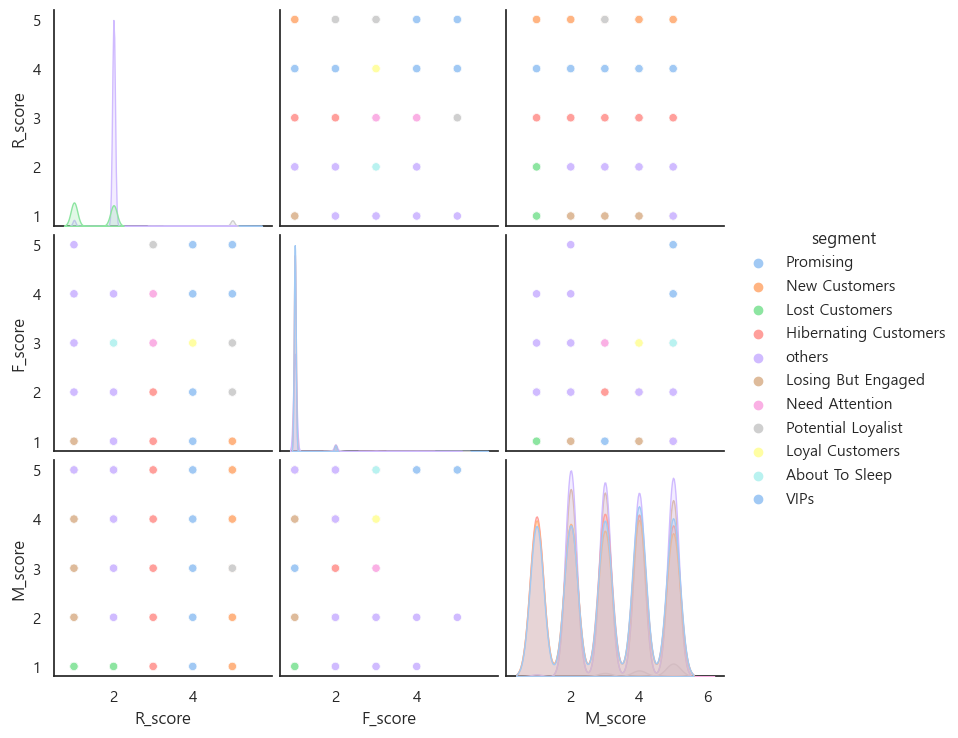

In [11]:
plt.figure(figsize=(12, 8))
sns.pairplot(df2[['R_score', 'F_score', 'M_score', 'segment']], hue='segment', palette='pastel')
plt.show()

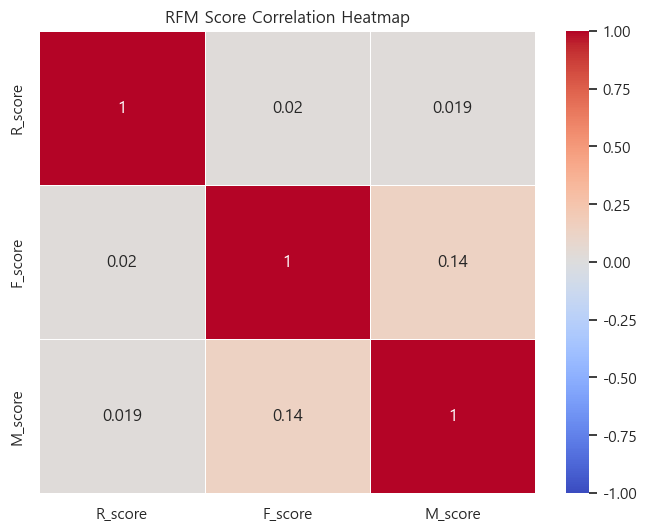

In [12]:
# R, F, M 점수의 상관관계 계산
rfm_corr = df2[['R_score', 'F_score', 'M_score']].corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('RFM Score Correlation Heatmap')
plt.show()

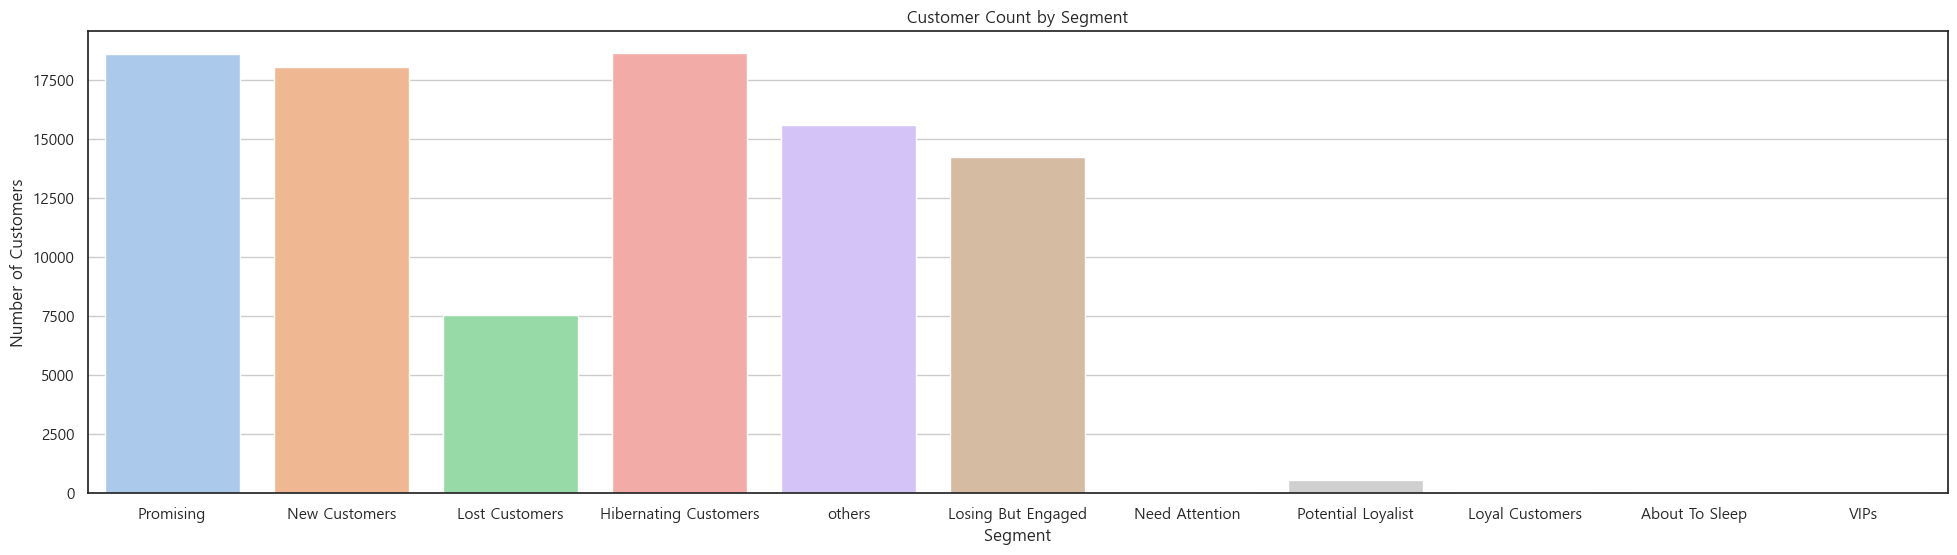

In [13]:
# 세그먼트별 고객 수 시각화

plt.figure(figsize=(24, 6))
sns.countplot(x='segment', data=df2, palette='pastel')
plt.title('Customer Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

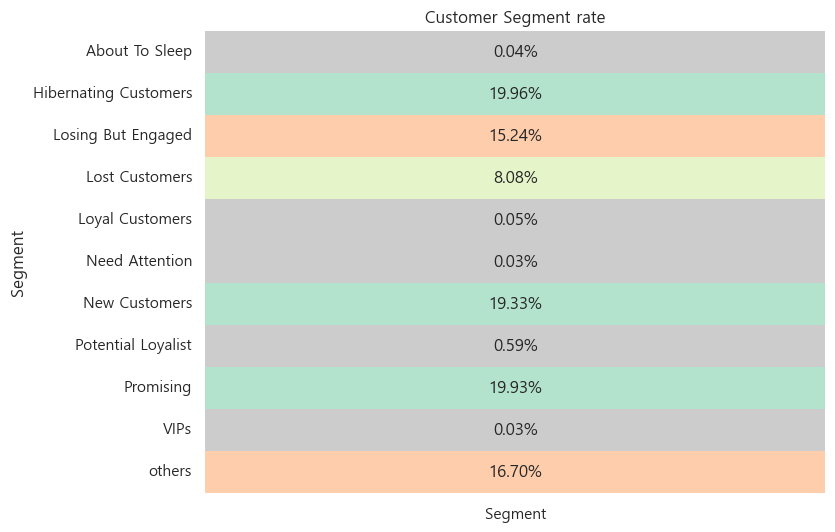

In [14]:
segment_counts = df2['segment'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 6))
sns.heatmap(segment_counts.values.reshape(-1, 1), annot=True, fmt=".2%", cmap='Pastel2_r', cbar=False,
            xticklabels=['Segment'], yticklabels=segment_counts.index)

plt.title('Customer Segment rate')
plt.ylabel('Segment')
plt.show()